In [106]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler


In [107]:
PATH_TO_CSV= 'data/processed/data.csv'  # Utilisation correcte du séparateur de chemin
R_STATE= 123

df = pd.read_csv(PATH_TO_CSV)
df.reset_index(drop=True, inplace=True)
df = df.drop(columns=['Unnamed: 0'])
df = df[df['grav'] != -1]


C:\Users\remi\AppData\Local\Temp\ipykernel_9392\3718387023.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PATH_TO_CSV)


KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
print(Counter(df['grav']))
df['grav'].value_counts().plot(kind='bar')
plt.title('Distribution initiale des classes')
plt.show()


NameError: name 'Counter' is not defined

Counter({1: 10263, 2: 10263, 3: 10263, 4: 10263})


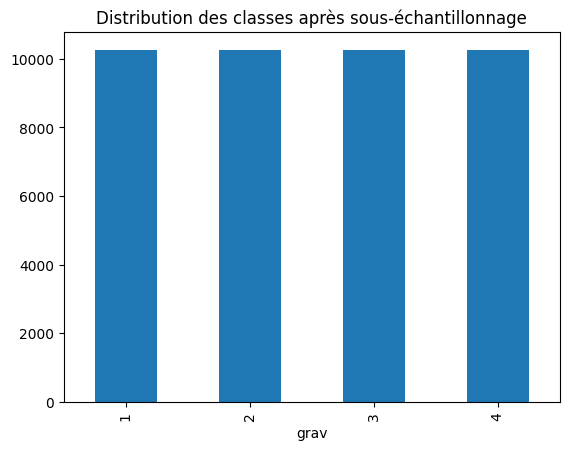

In [ ]:
X = df.drop(columns=['grav'])
y = df['grav']

rus = RandomUnderSampler(random_state=R_STATE)
X_res, y_res = rus.fit_resample(X, y)

print(Counter(y_res))
pd.Series(y_res).value_counts().plot(kind='bar')
plt.title('Distribution des classes après sous-échantillonnage')
plt.show()


In [ ]:
dummy_columns = ['lum', 'agg', 'int', 'atm', 'col', 'catr', 'circ', 'prof', 'place', 'catu', 'sexe', 
                 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp', 'senc', 'catv', 'obs', 
                 'obsm', 'choc', 'manv', 'motor', 'plan', 'surf','an','infra','dep','situ','vosp']
columns_to_scale = [col for col in X.columns if col not in dummy_columns]

scaler = StandardScaler()
X_scaled= scaler.fit_transform(X_res[columns_to_scale])

pca= PCA()
X_pca= pca.fit_transform(X_scaled)
variance= np.cumsum(pca.explained_variance_ratio_)
optimal_components= np.argmax(variance >= 0.95) + 1
print(f'Optimal components = {optimal_components}')

pca= PCA(n_components= optimal_components)
X_pca_optimal= pca.fit_transform(X_scaled)

Optimal components = 315


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_optimal, y_res, test_size=0.2, random_state=R_STATE)